<a href="https://colab.research.google.com/github/DataMinati/100-Super-Notebooks/blob/main/Autism_Detection_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv('../input/autism-prediction/Autism-prediction/train.csv')
test = pd.read_csv('../input/autism-prediction/Autism-prediction/test.csv')
train

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,1,42.084907,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,1,17.669291,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,1,18.242557,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,1,19.241473,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

## EDA

In [ ]:
train['Class/ASD'].value_counts()

0    615
1    185
Name: Class/ASD, dtype: int64

In [ ]:
train['Class/ASD'].value_counts(normalize=True)

0    0.76875
1    0.23125
Name: Class/ASD, dtype: float64

The target is imbalanced.   

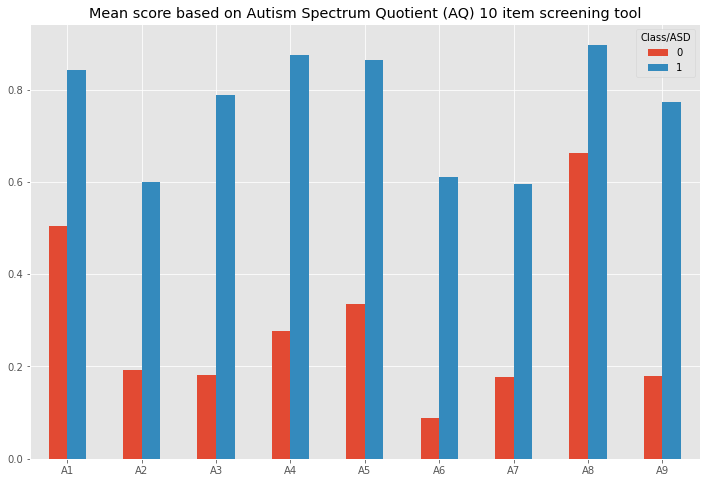

In [ ]:
score_features = train.filter(regex='A[0-9]_', axis=1).columns.tolist()
train.groupby('Class/ASD')[score_features].mean().T.plot.bar()
plt.title('Mean score based on Autism Spectrum Quotient (AQ) 10 item screening tool')
plt.xticks(ticks=range(len(score_features)), labels=[x.split('_')[0] for x in score_features], rotation=0);

In [ ]:
train.groupby('A1_Score')['Class/ASD'].mean()

A1_Score
0    0.086826
1    0.334764
Name: Class/ASD, dtype: float64

Seems that patients with higher scores are more likely to have autism.    

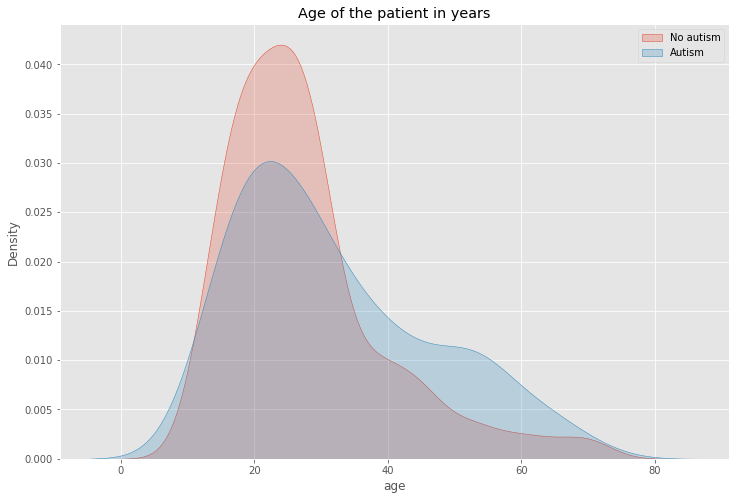

In [ ]:
sns.kdeplot(x='age', data=train[train['Class/ASD'] == 0], shade=True, label='No autism')
sns.kdeplot(x='age', data=train[train['Class/ASD'] == 1], shade=True, label='Autism')
plt.title('Age of the patient in years')
plt.legend();

The difference appears when the age becomes larger.      

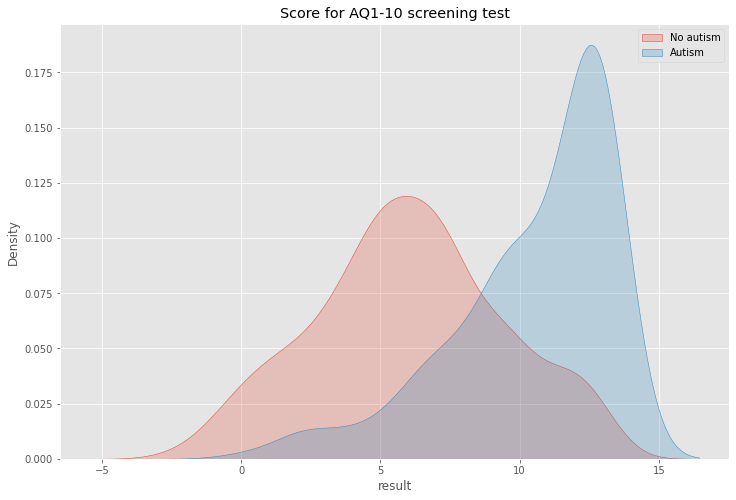

In [ ]:
sns.kdeplot(x='result', data=train[train['Class/ASD'] == 0], shade=True, label='No autism')
sns.kdeplot(x='result', data=train[train['Class/ASD'] == 1], shade=True, label='Autism')
plt.title('Score for AQ1-10 screening test')
plt.legend();

The distribution of result for pacients without autism is pretty simetric, with mean close to 5. In the other way, most of the pacients with autism shows bigger result values.     

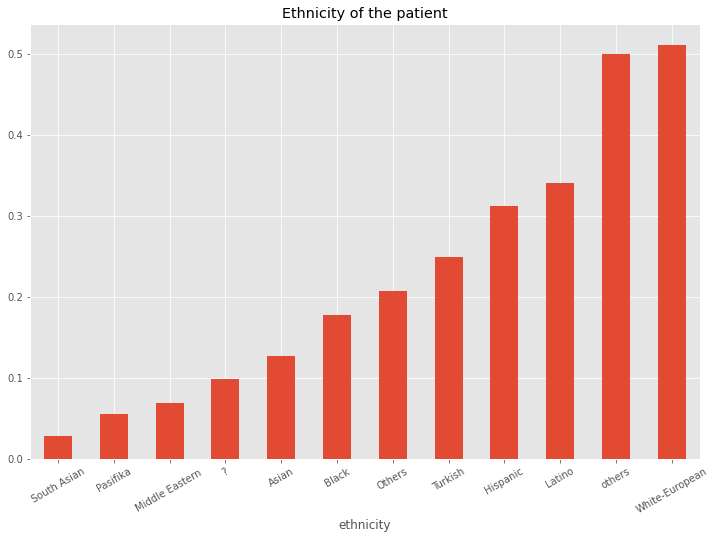

In [ ]:
train.groupby('ethnicity')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Ethnicity of the patient')
plt.xticks(rotation=30);

Curious that half of White-European in this dataset was observed with autism.  

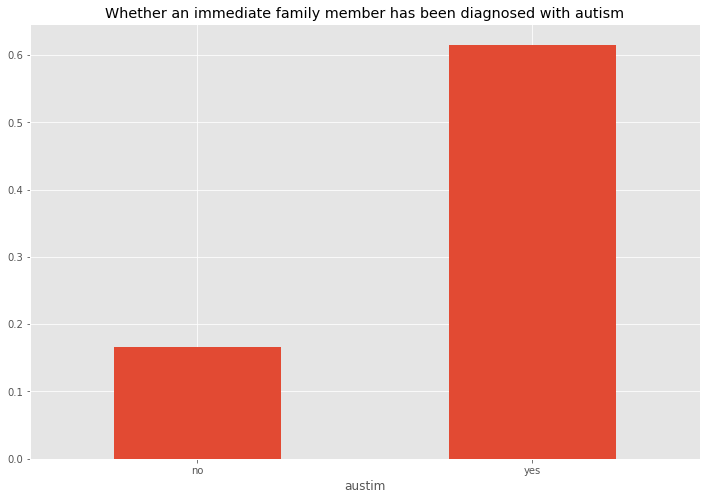

In [ ]:
train.groupby('austim')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Whether an immediate family member has been diagnosed with autism')
plt.xticks(rotation=0);

Patients with an immediate family that has autism seems to be more likely to has autism as well.   

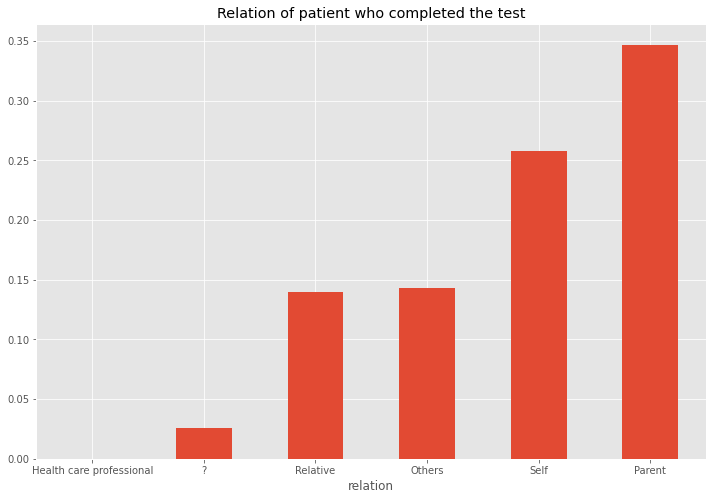

In [ ]:
train.groupby('relation')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Relation of patient who completed the test')
plt.xticks(rotation=0);

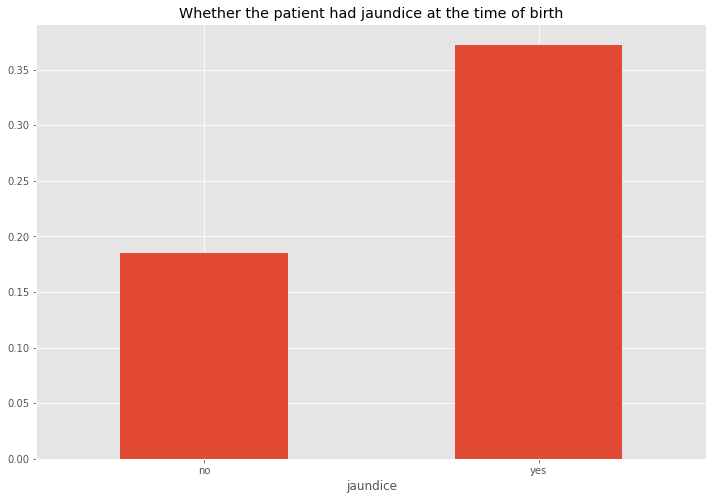

In [ ]:
train.groupby('jaundice')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Whether the patient had jaundice at the time of birth')
plt.xticks(rotation=0);

## Training

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# encode binary
binary_map = {'no': 0, 'yes': 1}
train['jaundice'] = train['jaundice'].map(binary_map)
train['austim'] = train['austim'].map(binary_map)
test['jaundice'] = test['jaundice'].map(binary_map)
test['austim'] = test['austim'].map(binary_map)

In [ ]:
features = [
    *score_features,
    'age',
    'jaundice',
    'austim',
    'result'
]

aucs = []
df_sub = test[['ID']].copy()

n_splits = 5
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (tr, val) in enumerate(kf.split(train[features], train['Class/ASD'])):
    print('FOLD:', fold)
    
    # split
    X_train = train.loc[tr, features]
    y_train = train.loc[tr, 'Class/ASD']
    X_val = train.loc[val, features]
    y_val = train.loc[val, 'Class/ASD']
    X_test = test[features]
    
    # fit
    model = LogisticRegression(
        random_state=1
    )
    model.fit(X_train, y_train)
    
    # predict
    preds = model.predict(X_val)
    probs = model.predict_proba(X_val)[:, 1]
    
    # predict on test set
    df_sub[f'fold_{fold}'] = model.predict_proba(X_test)[:, 1]
    
    # metrics
    report = metrics.classification_report(y_val, preds)
    auc = metrics.roc_auc_score(y_val, probs)
    aucs.append(auc)
    print(report)
    print('AUC:', auc)
    print()
    
print('-' * 30)
print('Mean:', np.mean(aucs))
print('Std:', np.std(aucs))

FOLD: 0
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       123
           1       0.69      0.73      0.71        37

    accuracy                           0.86       160
   macro avg       0.80      0.82      0.81       160
weighted avg       0.87      0.86      0.86       160

AUC: 0.9026587563172929

FOLD: 1
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       123
           1       0.79      0.62      0.70        37

    accuracy                           0.88       160
   macro avg       0.84      0.79      0.81       160
weighted avg       0.87      0.88      0.87       160

AUC: 0.931223906833663

FOLD: 2
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       123
           1       0.75      0.65      0.70        37

    accuracy                           0.87       160
   macro avg       0.82      0.79      0.81       160
w

## Checking submission

In [ ]:
df_sub['Class/ASD'] = df_sub.filter(regex='fold_', axis=1).mean(axis=1)
df_sub

,ID,fold_0,fold_1,fold_2,fold_3,fold_4,Class/ASD
0,1,0.005694,0.008954,0.009089,0.004857,0.008417,0.007402
1,2,0.029838,0.043144,0.051574,0.028707,0.049595,0.040572
2,3,0.028773,0.075092,0.076516,0.025263,0.061484,0.053426
3,4,0.549361,0.476600,0.575546,0.510669,0.555295,0.533494
4,5,0.232060,0.245349,0.194136,0.216777,0.248313,0.227327
...,...,...,...,...,...,...,...
195,196,0.034926,0.030876,0.042468,0.016397,0.035786,0.032091
196,197,0.415449,0.341393,0.414766,0.348219,0.410564,0.386078
197,198,0.438488,0.483360,0.508910,0.501542,0.546994,0.495859
198,199,0.876511,0.883451,0.876939,0.888970,0.881677,0.881509


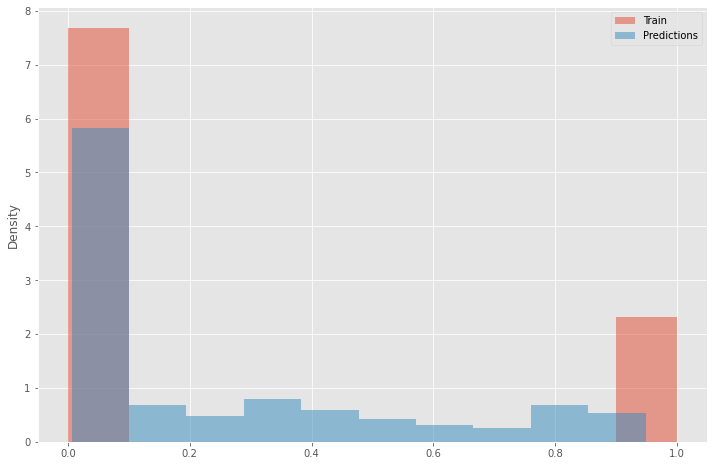

In [ ]:
train['Class/ASD'].plot.hist(density=True, alpha=0.5, label='Train')
df_sub['Class/ASD'].plot.hist(density=True, alpha=0.5, label='Predictions')
plt.legend()
plt.ylabel('Density');

We expect more density on the negative label (no autism) due the target imbalance that was observed in the training set, so this seems ok.   

In [ ]:
df_sub[['ID', 'Class/ASD']].to_csv('submission.csv', index=False)

In [ ]:
!head submission.csv

ID,Class/ASD
1,0.007402232552477675
2,0.04057158017656111
3,0.05342554470995049
4,0.5334940515810971
5,0.22732722853224363
6,0.01357434894805854
7,0.8310881951518665
8,0.01449512083249376
9,0.020087077791285407
